In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import tensorflow as td


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


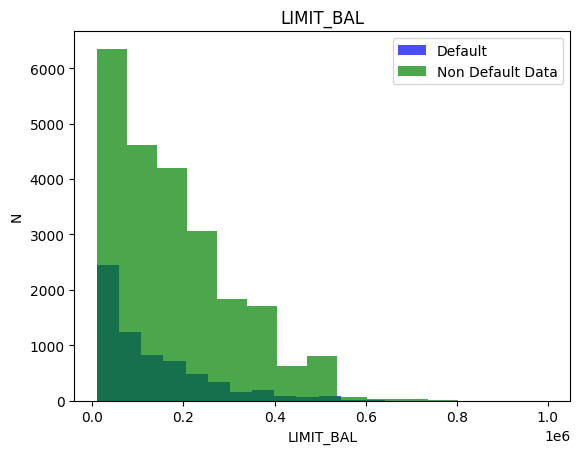

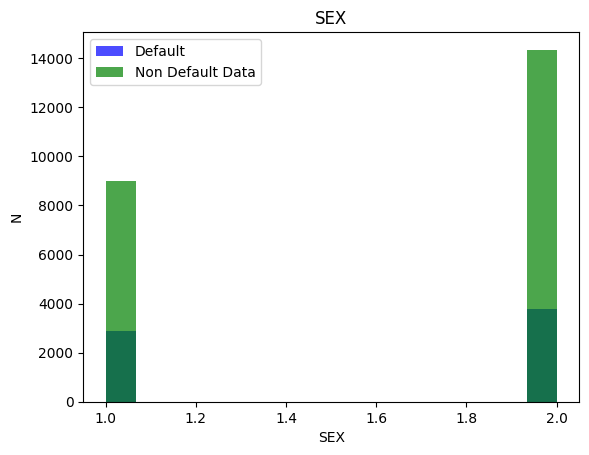

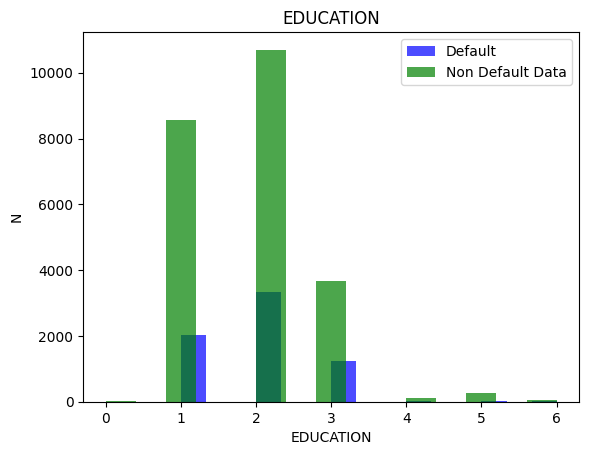

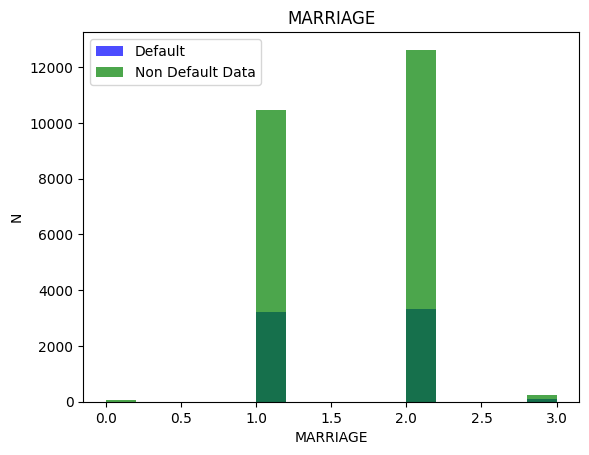

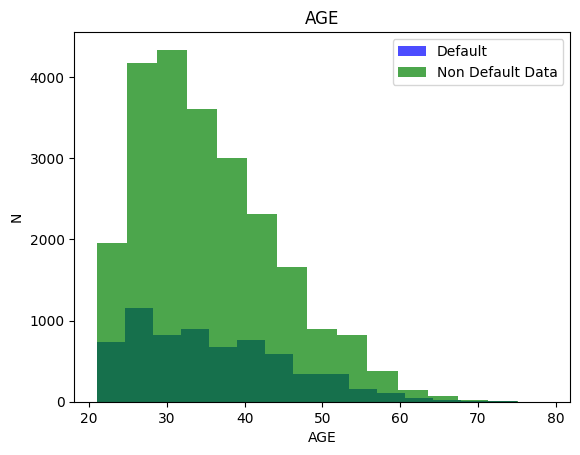

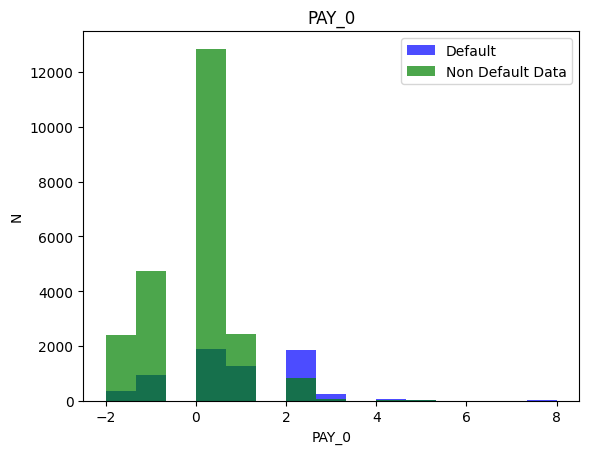

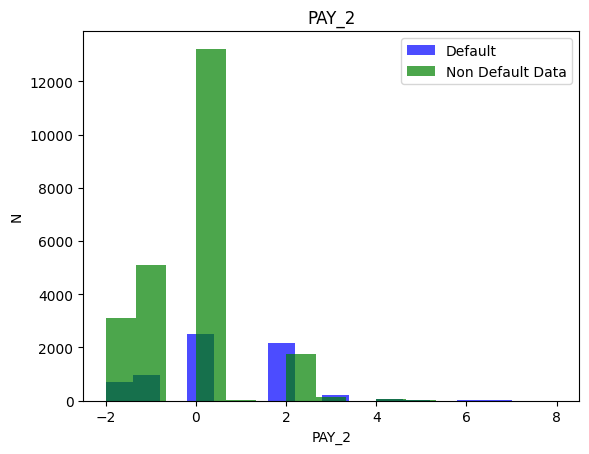

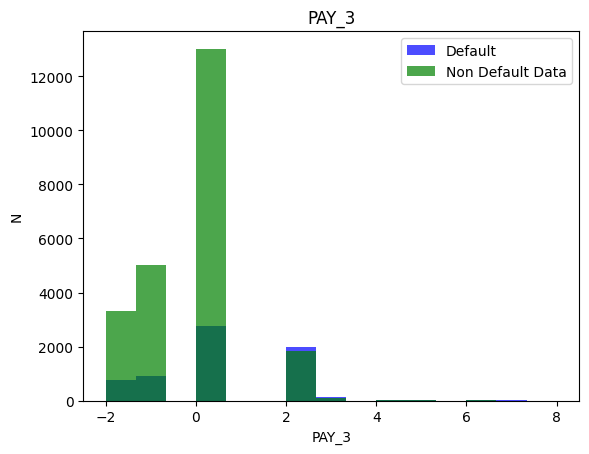

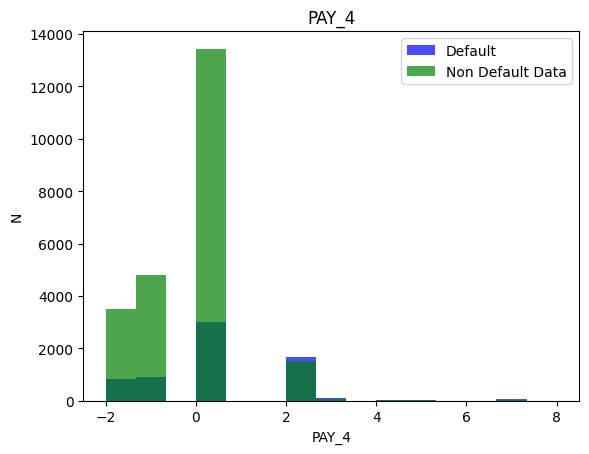

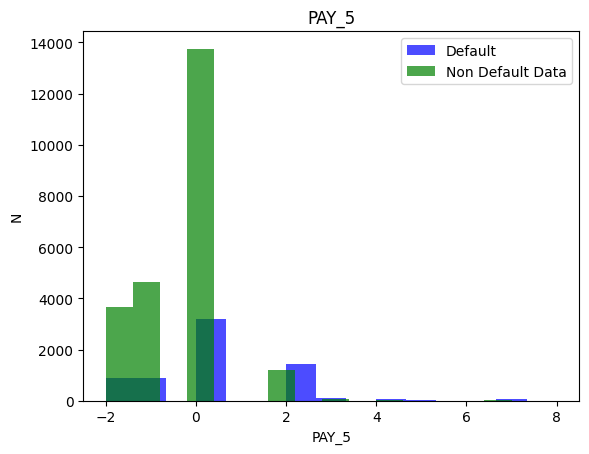

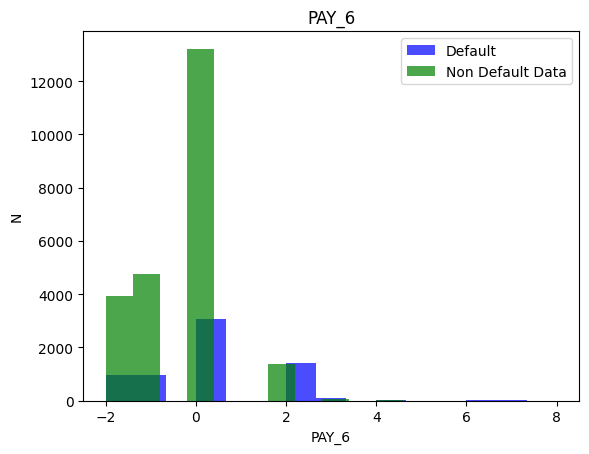

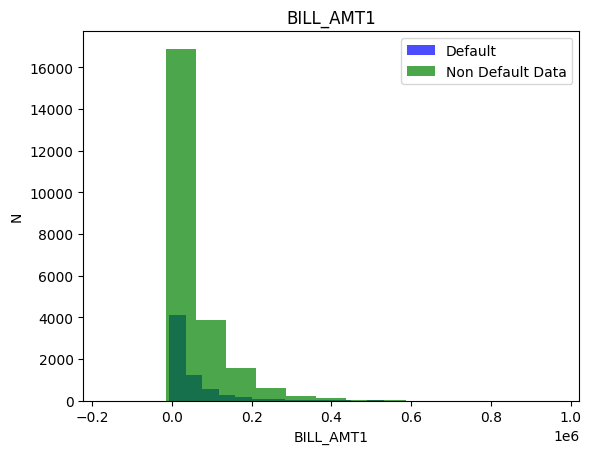

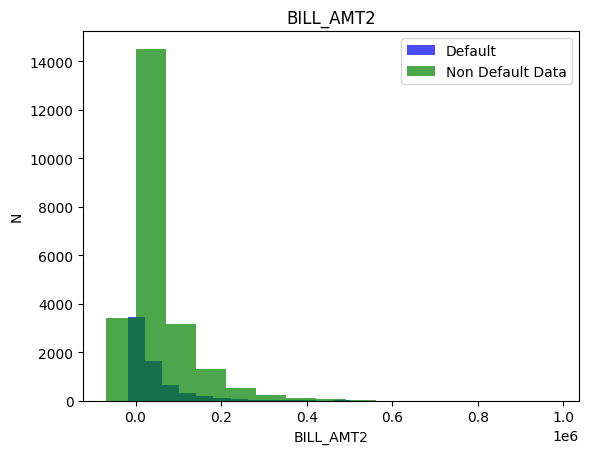

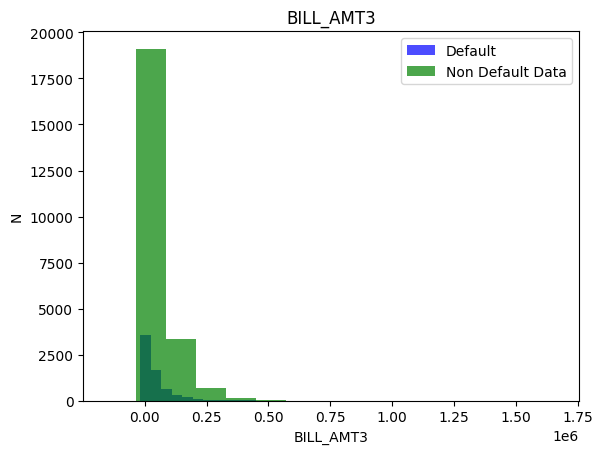

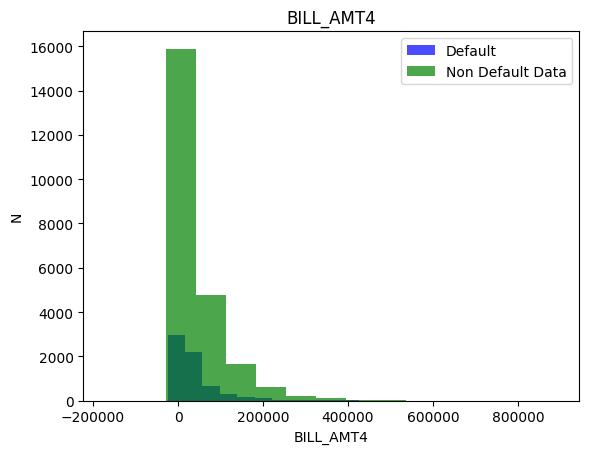

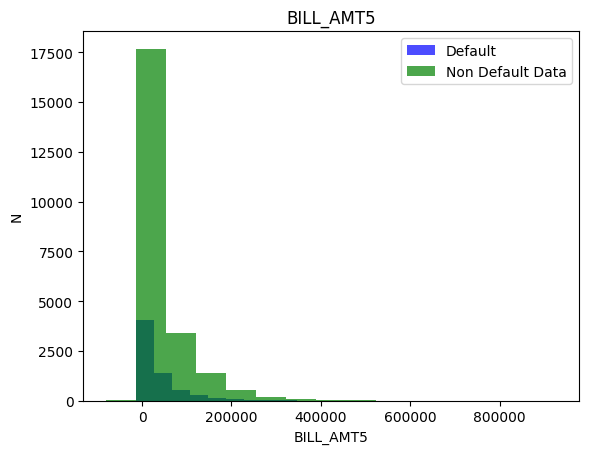

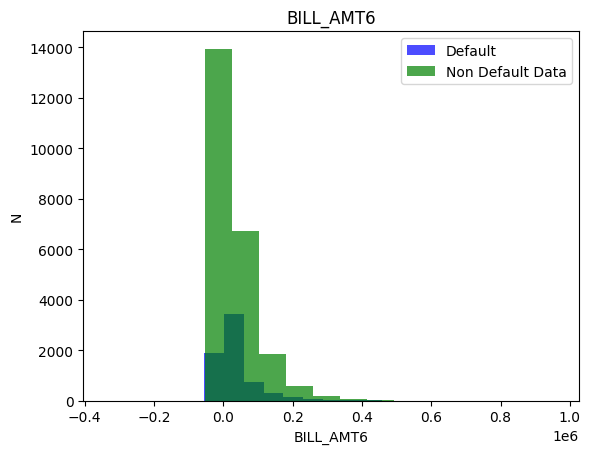

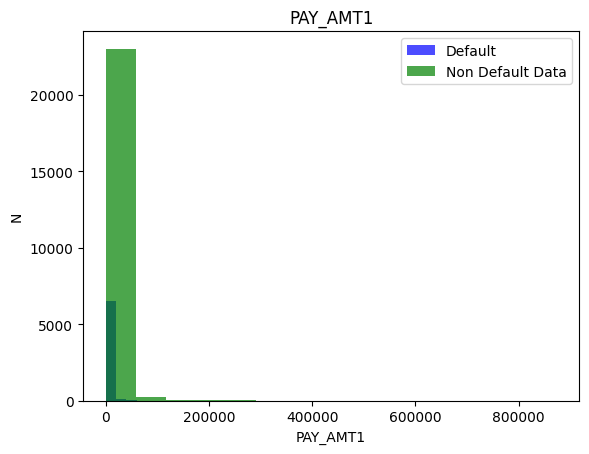

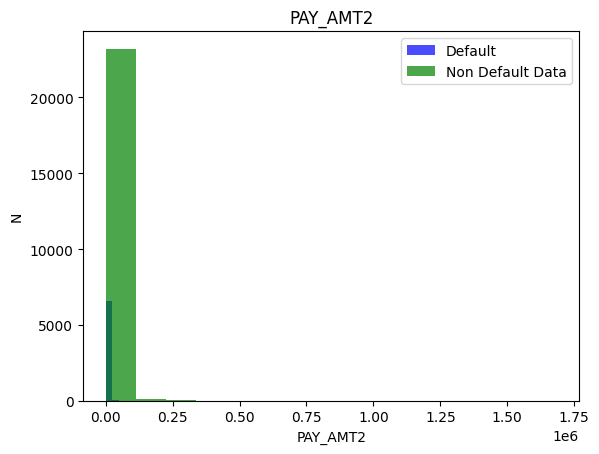

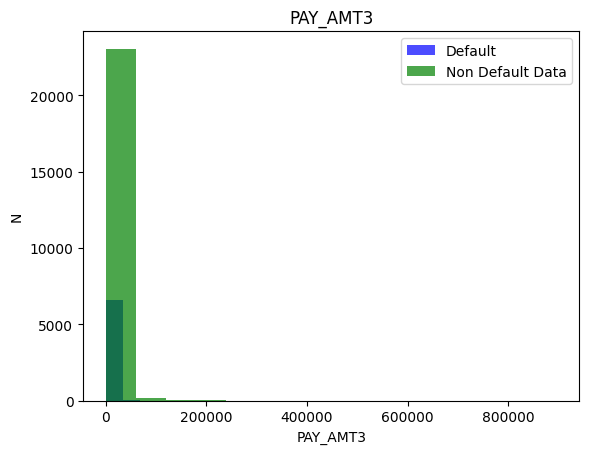

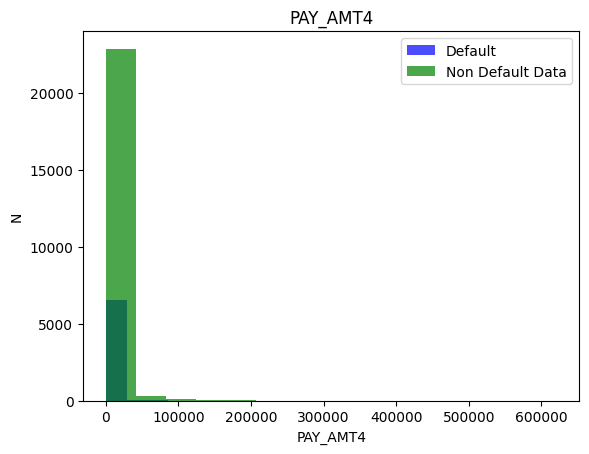

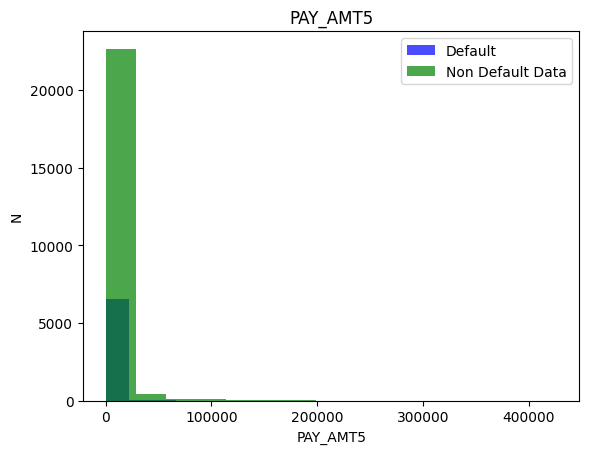

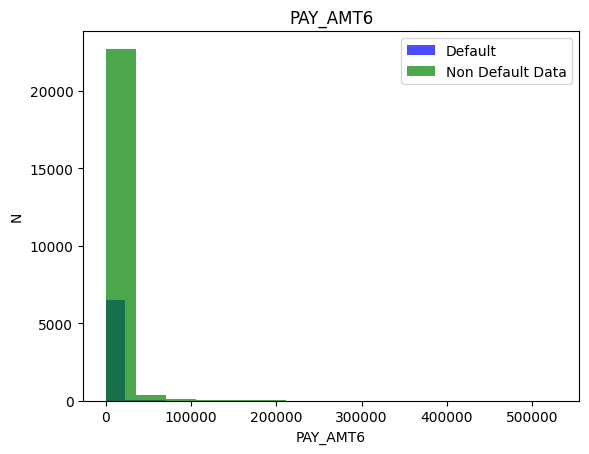

KeyError: 'default.payment.next.month'

In [3]:
df.dropna()
df.drop_duplicates()
df = df.drop('ID', axis=1)
columns = df.columns.tolist()
print(f"Columns = {columns}")
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)
for i in range(len(columns[-1])):
    label = columns[i]
    default_data = df[df['default'] == 1][label]
    non_default_data = df[df['default'] == 0][label]
    plt.hist(default_data, color = 'blue', bins = 15, alpha = 0.7, label = 'Default')
    plt.hist(non_default_data, color = 'green', bins = 15, alpha = 0.7, label = 'Non Default Data')
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('N')
    plt.legend()
    plt.show()

In [4]:
print(f"Total Default Entity = {len(df[df['default'] == 1])}")
print(f"Total Non Default Entity = {len(df[df['default'] == 0])}")

Total Default Entity = 6636
Total Non Default Entity = 23364


#### Random Sampling Data to make it balance

In [5]:
X = df[columns[:-1]]
dependent_variable = columns[-1]
Y = df[dependent_variable]

over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)
print(f"Total Default Entity = {len(Y[Y == 1])}")
print(f"Total Non Default Entity = {len(Y[Y == 0])}")

KeyError: 'default.payment.next.month'

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 15)

In [ ]:
n = len(X)
model = td.keras.Sequential([
    td.keras.layers.Dense(16, activation='relu'),
    td.keras.layers.Dense(16, activation='relu'),
    td.keras.layers.Dense(16, activation='relu'),
    td.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=td.keras.optimizers.Adam(learning_rate=0.001),
              loss =  td.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

print(f"Total Rows = {len(X)}")

Total Rows = 46728


In [58]:
model.fit(x_train, y_train, batch_size = 8, epochs = 20)

Epoch 1/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 385us/step - accuracy: 0.7320 - loss: 0.5275
Epoch 2/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 375us/step - accuracy: 0.7316 - loss: 0.5274
Epoch 3/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step - accuracy: 0.7304 - loss: 0.5269
Epoch 4/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.7325 - loss: 0.5268
Epoch 5/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 375us/step - accuracy: 0.7329 - loss: 0.5265
Epoch 6/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.7313 - loss: 0.5264
Epoch 7/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 378us/step - accuracy: 0.7319 - loss: 0.5264
Epoch 8/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 379us/step - accuracy: 0.7304 - loss: 0.5259
Epoch 9/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 376us/step - accuracy: 0.7325 - loss: 0.5260
Epoch 10/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step - accuracy: 0.7329 - loss: 0.5256
Epoch 11/20
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.7333 - loss: 0.5258
Epoch 12